In [1]:
import os
import pandas as pd
import numpy as np

import geopandas as gpd
import osmnx as ox
import folium
from folium.plugins import HeatMap
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import contextily as ctx
import geofeather
from geopandas import GeoDataFrame
from shapely.geometry import Point
from shapely import wkt
from shapely.geometry import Point, MultiPoint
from shapely.ops import nearest_points
from shapely import wkt

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm, tqdm_notebook

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor 
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform
from sklearn.preprocessing import StandardScaler 
from pprint import pprint
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
df_1 = pd.read_csv("C:/NYU_MFE/Machine Learning/Home_n_Map.csv")
df_1.head(5)

NO value  NO2 value  PM2p5 value                                geometry  \
0  23.390071  17.539762    17.612700        POINT (-122.3225938 37.80678062)   
1  19.700000  19.956750    15.946719          POINT (-122.32231 37.80614989)   
2  23.611111  23.967768    16.210698        POINT (-122.3223008 37.80642014)   
3  15.714285  18.435184    15.561862  POINT (-122.3222988 37.80587979999999)   
4  27.108695  25.797037    17.120884        POINT (-122.3222671 37.80668898)   

   road_type        zone                                     tract_name  \
0   tertiary  industrial  Census Tract 9819, Alameda County, California   
1  secondary  industrial  Census Tract 9819, Alameda County, California   
2  secondary  industrial  Census Tract 9819, Alameda County, California   
3  secondary  industrial  Census Tract 9819, Alameda County, California   
4  secondary  industrial  Census Tract 9819, Alameda County, California   

        GEOID  state  county   pop_den      wind       temp   Longitude  \
0  6001981900      6       1  8.336845  4.133333  14.950001 -122.322594   
1  6001981900      6       1  8.336845  4.133333  14.950001 -122.322310   
2  6001981900      6       1  8.336845  4.133333  14.950001 -122.322301   
3  6001981900      6       1  8.336845  4.133333  14.950001 -122.322299   
4  6001981900      6       1  8.336845  4.133333  14.950001 -122.322267   

    Latitude Respiratory_HI   Pt_CANCR  
0  37.806781           high  0.7 - 0.8  
1  37.806150           high  0.7 - 0.8  
2  37.806420           high  0.7 - 0.8  
3  37.805880           high  0.7 - 0.8  
4  37.806689           high  0.7 - 0.8

In [4]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18286 entries, 0 to 18285
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   NO value        18286 non-null  float64
 1   NO2 value       18286 non-null  float64
 2   PM2p5 value     18286 non-null  float64
 3   geometry        18286 non-null  object 
 4   road_type       18286 non-null  object 
 5   zone            18238 non-null  object 
 6   tract_name      18286 non-null  object 
 7   GEOID           18286 non-null  int64  
 8   state           18286 non-null  int64  
 9   county          18286 non-null  int64  
 10  pop_den         18286 non-null  float64
 11  wind            18270 non-null  float64
 12  temp            18270 non-null  float64
 13  Longitude       18286 non-null  float64
 14  Latitude        18286 non-null  float64
 15  Respiratory_HI  18286 non-null  object 
 16  Pt_CANCR        18286 non-null  object 
dtypes: float64(8), int64(3), object

In [5]:
gpd_1_degree = gpd.GeoDataFrame(df_1, geometry=gpd.points_from_xy(df_1.Longitude, df_1.Latitude), crs={'init' :'epsg:4326'})
gpd_1_degree.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 18286 entries, 0 to 18285
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   NO value        18286 non-null  float64 
 1   NO2 value       18286 non-null  float64 
 2   PM2p5 value     18286 non-null  float64 
 3   geometry        18286 non-null  geometry
 4   road_type       18286 non-null  object  
 5   zone            18238 non-null  object  
 6   tract_name      18286 non-null  object  
 7   GEOID           18286 non-null  int64   
 8   state           18286 non-null  int64   
 9   county          18286 non-null  int64   
 10  pop_den         18286 non-null  float64 
 11  wind            18270 non-null  float64 
 12  temp            18270 non-null  float64 
 13  Longitude       18286 non-null  float64 
 14  Latitude        18286 non-null  float64 
 15  Respiratory_HI  18286 non-null  object  
 16  Pt_CANCR        18286 non-null  object  
dtypes: f

C:\Users\10097\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


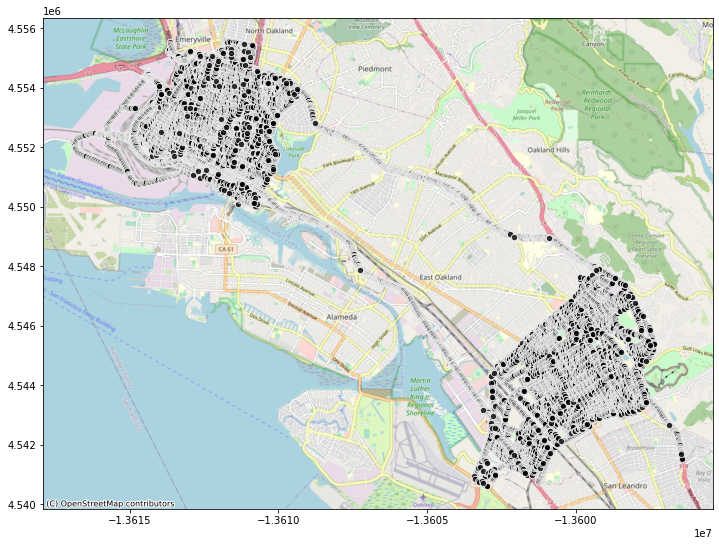

In [6]:
fig, ax = plt.subplots(figsize=(12, 10))
gpd_1_degree.to_crs(epsg=3857).plot(ax = ax,
                figsize=(12,12),
                markersize=40,
               color="black",
               edgecolor="white",
               alpha=0.8,
               marker="o"
            );
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

In [7]:
df_1.head(2)

NO value  NO2 value  PM2p5 value                     geometry  road_type  \
0  23.390071  17.539762    17.612700  POINT (-122.32259 37.80678)   tertiary   
1  19.700000  19.956750    15.946719  POINT (-122.32231 37.80615)  secondary   

         zone                                     tract_name       GEOID  \
0  industrial  Census Tract 9819, Alameda County, California  6001981900   
1  industrial  Census Tract 9819, Alameda County, California  6001981900   

   state  county   pop_den      wind       temp   Longitude   Latitude  \
0      6       1  8.336845  4.133333  14.950001 -122.322594  37.806781   
1      6       1  8.336845  4.133333  14.950001 -122.322310  37.806150   

  Respiratory_HI   Pt_CANCR  
0           high  0.7 - 0.8  
1           high  0.7 - 0.8

In [8]:
df_1 = df_1.rename(columns={'NO value': 'NO'})
df_1 = df_1.rename(columns={'NO2 value': 'NO2'})
df_1 = df_1.rename(columns={'PM2p5 value': 'PM2p5'})

In [9]:
df_1.nunique()

NO                16015
NO2               18226
PM2p5             18281
geometry          18281
road_type             6
zone                  5
tract_name           73
GEOID                73
state                 1
county                1
pop_den              73
wind                 45
temp                 80
Longitude         18129
Latitude          18257
Respiratory_HI        3
Pt_CANCR              3
dtype: int64

In [10]:
# drop useless features
df_1_drop = df_1.drop(['state', 'county', 'tract_name', 'GEOID'], axis=1)
df_1_drop.head(2)

NO        NO2      PM2p5                     geometry  road_type  \
0  23.390071  17.539762  17.612700  POINT (-122.32259 37.80678)   tertiary   
1  19.700000  19.956750  15.946719  POINT (-122.32231 37.80615)  secondary   

         zone   pop_den      wind       temp   Longitude   Latitude  \
0  industrial  8.336845  4.133333  14.950001 -122.322594  37.806781   
1  industrial  8.336845  4.133333  14.950001 -122.322310  37.806150   

  Respiratory_HI   Pt_CANCR  
0           high  0.7 - 0.8  
1           high  0.7 - 0.8

In [11]:
df_1_drop.isnull().sum()

NO                 0
NO2                0
PM2p5              0
geometry           0
road_type          0
zone              48
pop_den            0
wind              16
temp              16
Longitude          0
Latitude           0
Respiratory_HI     0
Pt_CANCR           0
dtype: int64

In [12]:
df_1_miss = df_1_drop.dropna(axis=0, subset=['zone', 'wind', 'temp'])
df_1_miss.tail(2)

NO        NO2      PM2p5                     geometry road_type  \
18284   9.333333   9.039947  11.325624  POINT (-122.15509 37.77014)  motorway   
18285  18.842105  16.122072   9.270166  POINT (-122.13903 37.73246)  motorway   

              zone      pop_den      wind       temp   Longitude   Latitude  \
18284  residential  1475.818172  3.766667  14.600001 -122.155090  37.770138   
18285  residential   486.040242  3.816667  15.041669 -122.139033  37.732464   

      Respiratory_HI Pt_CANCR  
18284            low    < 0.4  
18285            low    < 0.4

In [13]:
df_1_miss = df_1_miss.reset_index()
df_1_miss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18222 entries, 0 to 18221
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   index           18222 non-null  int64   
 1   NO              18222 non-null  float64 
 2   NO2             18222 non-null  float64 
 3   PM2p5           18222 non-null  float64 
 4   geometry        18222 non-null  geometry
 5   road_type       18222 non-null  object  
 6   zone            18222 non-null  object  
 7   pop_den         18222 non-null  float64 
 8   wind            18222 non-null  float64 
 9   temp            18222 non-null  float64 
 10  Longitude       18222 non-null  float64 
 11  Latitude        18222 non-null  float64 
 12  Respiratory_HI  18222 non-null  object  
 13  Pt_CANCR        18222 non-null  object  
dtypes: float64(8), geometry(1), int64(1), object(4)
memory usage: 1.9+ MB


In [14]:
df_1_miss = df_1_miss.drop(['index'], axis=1)

In [15]:
df_1_miss[df_1_miss.duplicated()]

NO        NO2      PM2p5                     geometry  road_type  \
174   32.059862  24.190178  19.514652  POINT (-122.30853 37.81503)  secondary   
504   16.426667  19.134740  18.727645  POINT (-122.30013 37.80641)  secondary   
7161  92.638344  45.426999  28.987625  POINT (-122.23379 37.77509)   motorway   

            zone      pop_den      wind       temp   Longitude   Latitude  \
174   industrial   220.026011  4.125000  15.000001 -122.308528  37.815028   
504        mixed  3520.358174  4.083333  15.083335 -122.300129  37.806411   
7161       mixed  2351.277070  4.091667  15.166668 -122.233788  37.775092   

     Respiratory_HI   Pt_CANCR  
174            high  0.7 - 0.8  
504            high  0.7 - 0.8  
7161           high  0.7 - 0.8

In [16]:
# print the first & last rows BEFORE removing duplicated values
df_1_miss.iloc[[0,-1]]

NO        NO2      PM2p5                     geometry road_type  \
0      23.390071  17.539762  17.612700  POINT (-122.32259 37.80678)  tertiary   
18221  18.842105  16.122072   9.270166  POINT (-122.13903 37.73246)  motorway   

              zone     pop_den      wind       temp   Longitude   Latitude  \
0       industrial    8.336845  4.133333  14.950001 -122.322594  37.806781   
18221  residential  486.040242  3.816667  15.041669 -122.139033  37.732464   

      Respiratory_HI   Pt_CANCR  
0               high  0.7 - 0.8  
18221            low      < 0.4

In [17]:
df_1_dup = df_1_miss.drop_duplicates()
df_1_dup.tail(2)

NO        NO2      PM2p5                     geometry road_type  \
18220   9.333333   9.039947  11.325624  POINT (-122.15509 37.77014)  motorway   
18221  18.842105  16.122072   9.270166  POINT (-122.13903 37.73246)  motorway   

              zone      pop_den      wind       temp   Longitude   Latitude  \
18220  residential  1475.818172  3.766667  14.600001 -122.155090  37.770138   
18221  residential   486.040242  3.816667  15.041669 -122.139033  37.732464   

      Respiratory_HI Pt_CANCR  
18220            low    < 0.4  
18221            low    < 0.4

In [18]:
df_1_dup.reset_index(inplace=True)
# check duplicated values
df_1_dup[df_1_dup.duplicated()]

Empty DataFrame
Columns: [index, NO, NO2, PM2p5, geometry, road_type, zone, pop_den, wind, temp, Longitude, Latitude, Respiratory_HI, Pt_CANCR]
Index: []

In [19]:
df_1_dup.iloc[[0,-1]]

index         NO        NO2      PM2p5                     geometry  \
0          0  23.390071  17.539762  17.612700  POINT (-122.32259 37.80678)   
18218  18221  18.842105  16.122072   9.270166  POINT (-122.13903 37.73246)   

      road_type         zone     pop_den      wind       temp   Longitude  \
0      tertiary   industrial    8.336845  4.133333  14.950001 -122.322594   
18218  motorway  residential  486.040242  3.816667  15.041669 -122.139033   

        Latitude Respiratory_HI   Pt_CANCR  
0      37.806781           high  0.7 - 0.8  
18218  37.732464            low      < 0.4

In [20]:
df_1_out = df_1_dup.copy()
df_1_out.head(1)

index         NO        NO2    PM2p5                     geometry  \
0      0  23.390071  17.539762  17.6127  POINT (-122.32259 37.80678)   

  road_type        zone   pop_den      wind       temp   Longitude   Latitude  \
0  tertiary  industrial  8.336845  4.133333  14.950001 -122.322594  37.806781   

  Respiratory_HI   Pt_CANCR  
0           high  0.7 - 0.8

<AxesSubplot:ylabel='temp'>

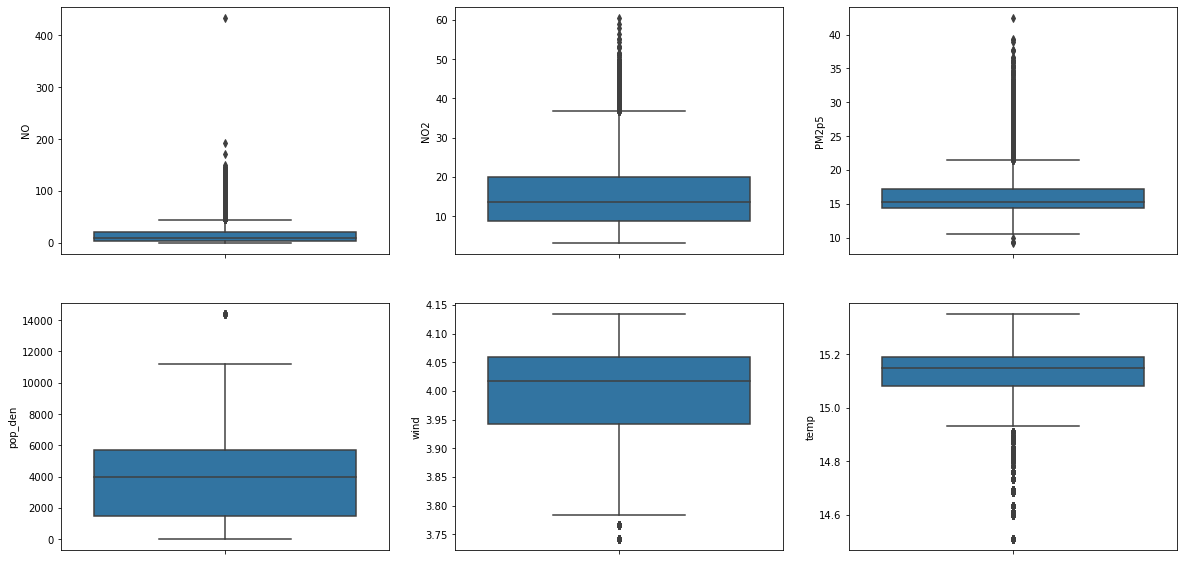

In [21]:
# checking outliers
_,axss = plt.subplots(2,3, figsize=[20,10])  # create a 2x3 matrix = 6 figures
sns.boxplot(y ='NO', data=df_1_out, ax=axss[0, 0])
sns.boxplot(y ='NO2', data=df_1_out, ax=axss[0, 1])
sns.boxplot(y ='PM2p5', data=df_1_out, ax=axss[0, 2])
sns.boxplot(y ='pop_den', data=df_1_out, ax=axss[1][0])
sns.boxplot(y ='wind', data=df_1_out, ax=axss[1][1])
sns.boxplot(y ='temp', data=df_1_out, ax=axss[1][2])

In [22]:
# Mannually remove outliers based on knowledge
# if NO > 200 -> let all of them equl to 200
df_1_out.loc[df_1_out['NO'] > 200, 'NO'] = 200

In [23]:
Oakland_poly = ox.geocode_to_gdf('Oakland, California')
Oakland_poly

geometry  bbox_north  bbox_south  \
0  POLYGON ((-122.35588 37.83573, -122.35009 37.8...   37.885426   37.633676   

   bbox_east   bbox_west   place_id  osm_type   osm_id        lat         lon  \
0 -122.11442 -122.355881  298690193  relation  2833530  37.804456 -122.271356   

                                        display_name     class  \
0  Oakland, Alameda County, CAL Fire Northern Reg...  boundary   

             type  importance  
0  administrative    0.851796

<AxesSubplot:>

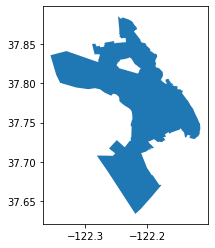

In [24]:
Oakland_poly.plot()

In [25]:
# conver geometey object -> geo df
gpd_1_degree = gpd.GeoDataFrame(df_1_out, geometry = df_1_out['geometry'], crs={'init' :'epsg:4326'})
Oakland_poly.crs, gpd_1_degree.crs

(<Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich,
 <Geographic 2D CRS: +init=epsg:4326 +type=crs>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - lon[east]: Longitude (degree)
 - lat[north]: Latitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich)

In [26]:
gpd_1_degree.head(2)

index         NO        NO2      PM2p5                     geometry  \
0      0  23.390071  17.539762  17.612700  POINT (-122.32259 37.80678)   
1      1  19.700000  19.956750  15.946719  POINT (-122.32231 37.80615)   

   road_type        zone   pop_den      wind       temp   Longitude  \
0   tertiary  industrial  8.336845  4.133333  14.950001 -122.322594   
1  secondary  industrial  8.336845  4.133333  14.950001 -122.322310   

    Latitude Respiratory_HI   Pt_CANCR  
0  37.806781           high  0.7 - 0.8  
1  37.806150           high  0.7 - 0.8

In [27]:
gpd_1_city = gpd.sjoin(gpd_1_degree, Oakland_poly, how="inner", op="intersects")
gpd_1_city.head(2)

C:\Users\10097\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3309: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\10097\AppData\Local\Temp\ipykernel_9152\59790562.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: +init=epsg:4326 +type=crs
Right CRS: EPSG:4326

  gpd_1_city = gpd.sjoin(gpd_1_degree, Oakland_poly, how="inner", op="intersects")


index         NO        NO2      PM2p5                     geometry  \
0      0  23.390071  17.539762  17.612700  POINT (-122.32259 37.80678)   
1      1  19.700000  19.956750  15.946719  POINT (-122.32231 37.80615)   

   road_type        zone   pop_den      wind       temp  ...   bbox_west  \
0   tertiary  industrial  8.336845  4.133333  14.950001  ... -122.355881   
1  secondary  industrial  8.336845  4.133333  14.950001  ... -122.355881   

    place_id  osm_type   osm_id        lat         lon  \
0  298690193  relation  2833530  37.804456 -122.271356   
1  298690193  relation  2833530  37.804456 -122.271356   

                                        display_name     class  \
0  Oakland, Alameda County, CAL Fire Northern Reg...  boundary   
1  Oakland, Alameda County, CAL Fire Northern Reg...  boundary   

             type  importance  
0  administrative    0.851796  
1  administrative    0.851796  

[2 rows x 28 columns]

In [28]:
gpd_1_city.nunique()

index             18219
NO                15963
NO2               18162
PM2p5             18217
geometry          18217
road_type             6
zone                  5
pop_den              70
wind                 45
temp                 80
Longitude         18067
Latitude          18194
Respiratory_HI        3
Pt_CANCR              3
index_right           1
bbox_north            1
bbox_south            1
bbox_east             1
bbox_west             1
place_id              1
osm_type              1
osm_id                1
lat                   1
lon                   1
display_name          1
class                 1
type                  1
importance            1
dtype: int64

In [29]:
gpd_1_city = gpd_1_city.drop(['index_right', 'bbox_east', 'bbox_north', 'bbox_south', 'bbox_west'], axis=1)

In [30]:
oak_streets = ox.graph_from_place('Oakland, California', network_type = 'drive')
nodes, edges = ox.graph_to_gdfs(oak_streets)

In [31]:
nodes.head(1)

y           x ref            highway  street_count  \
osmid                                                                  
30362888  37.825844 -122.303049  8A  motorway_junction             3   

                             geometry  
osmid                                  
30362888  POINT (-122.30305 37.82584)

In [32]:
edges.head(1)

osmid  oneway lanes   ref   highway maxspeed  \
u        v          key                                                     
30362888 1943438853 0    710721717    True     7  I 80  motorway   50 mph   

                        reversed   length  \
u        v          key                     
30362888 1943438853 0      False  135.576   

                                                                  geometry  \
u        v          key                                                      
30362888 1943438853 0    LINESTRING (-122.30305 37.82584, -122.30455 37...   

                        bridge name tunnel access junction  
u        v          key                                     
30362888 1943438853 0      NaN  NaN    NaN    NaN      NaN

<AxesSubplot:>

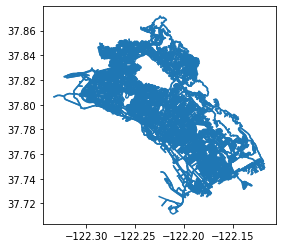

In [33]:
edges.plot()

In [34]:
# identify roads 
oakland_rds = edges.copy()
oakland_rds['highway'].value_counts()

residential                        15065
secondary                           2928
tertiary                            2495
primary                              773
motorway_link                        319
unclassified                         229
motorway                             204
secondary_link                       109
living_street                         78
trunk                                 58
tertiary_link                         43
trunk_link                            38
primary_link                          15
[residential, unclassified]            8
[residential, living_street]           2
[secondary_link, motorway_link]        2
[residential, secondary]               1
Name: highway, dtype: int64

In [35]:
oakland_rds['highway'] = oakland_rds['highway'].str.replace('_link', '')
oakland_rds['highway'] = np.where(oakland_rds['highway'] == 'trunk', 'secondary', oakland_rds['highway'])
oakland_rds['highway'] = np.where(oakland_rds['highway'] == 'living_street', 'residential', oakland_rds['highway'])

# check results
oakland_rds['highway'].value_counts()

residential     15143
secondary        3133
tertiary         2538
primary           788
motorway          523
unclassified      229
Name: highway, dtype: int64

C:\Users\10097\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='highway', ylabel='count'>

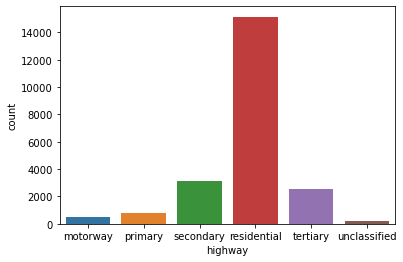

In [36]:
sns.countplot(oakland_rds['highway'])

In [37]:
oakland_highways = oakland_rds[oakland_rds.highway == 'motorway']
oakland_primary = oakland_rds[oakland_rds.highway == 'primary']
oakland_secondary = oakland_rds[oakland_rds.highway == 'secondary']
oakland_tertiary = oakland_rds[oakland_rds.highway == 'tertiary']
oakland_resid = oakland_rds[oakland_rds.highway == 'residential']

oakland_highways.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

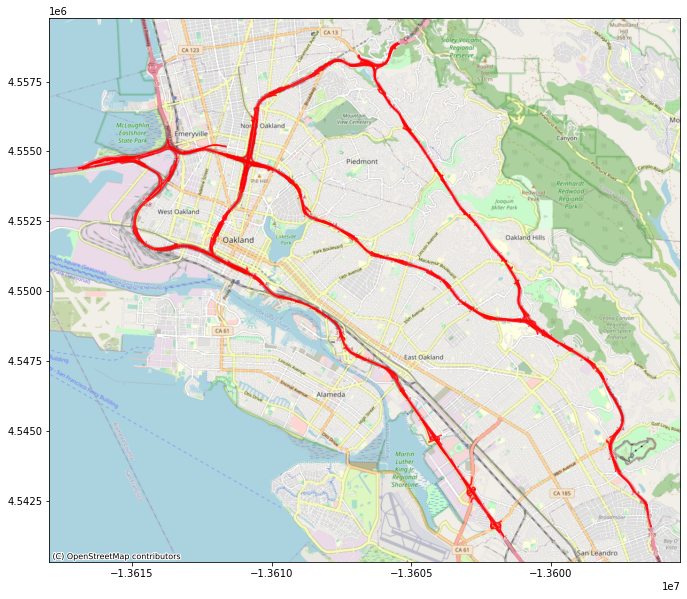

In [38]:
# highway
fig, ax = plt.subplots(figsize=(12, 10))
oakland_highways.to_crs(epsg=3857).plot(ax = ax,
                figsize=(12,12),
                markersize=40,
               color="red",
               edgecolor="white",
               alpha=0.8,
               marker="o"
            );
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

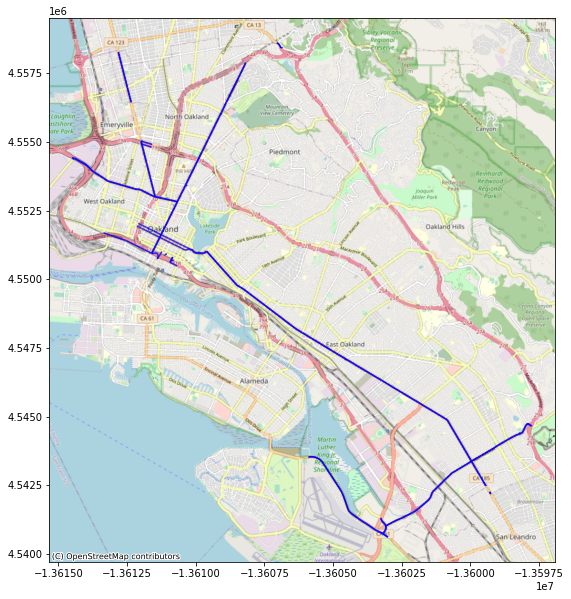

In [39]:
# primary road
fig, ax = plt.subplots(figsize=(12, 10))
oakland_primary.to_crs(epsg=3857).plot(ax = ax,
                figsize=(12,12),
                markersize=40,
               color="blue",
               edgecolor="white",
               alpha=0.8,
               marker="o"
            );
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

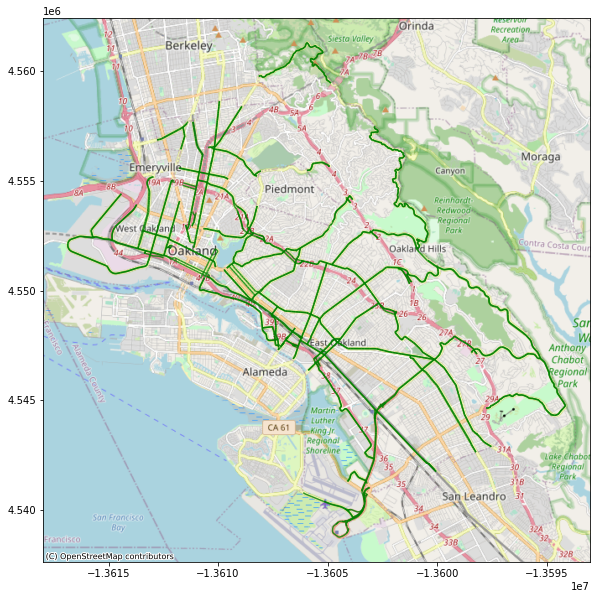

In [40]:
# secondary road
fig, ax = plt.subplots(figsize=(12, 10))
oakland_secondary.to_crs(epsg=3857).plot(ax = ax,
                figsize=(12,12),
                markersize=40,
               color="green",
               edgecolor="white",
               alpha=0.8,
               marker="o"
            );
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

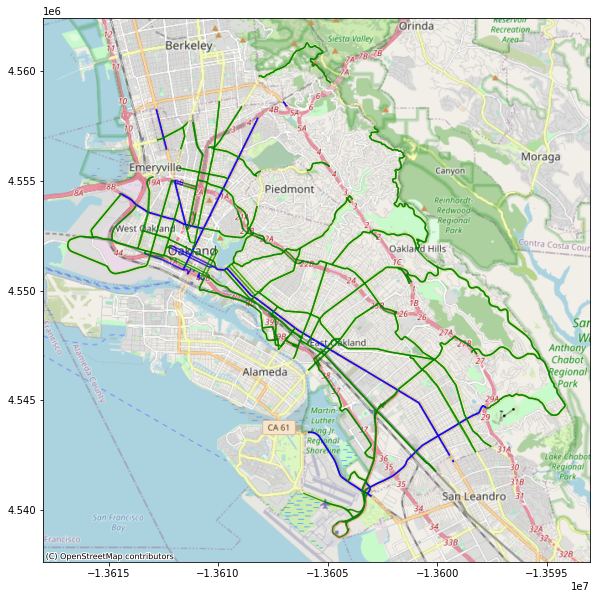

In [41]:
# primary & secondary

fig, ax = plt.subplots(figsize=(12, 10))
oakland_primary.to_crs(epsg=3857).plot(ax = ax,
                figsize=(12,12),
                markersize=40,
               color="blue",
               edgecolor="white",
               alpha=0.8,
               marker="o"
            );
oakland_secondary.to_crs(epsg=3857).plot(ax = ax,
                figsize=(12,12),
                markersize=40,
               color="green",
               edgecolor="white",
               alpha=0.8,
               marker="o"
            );

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

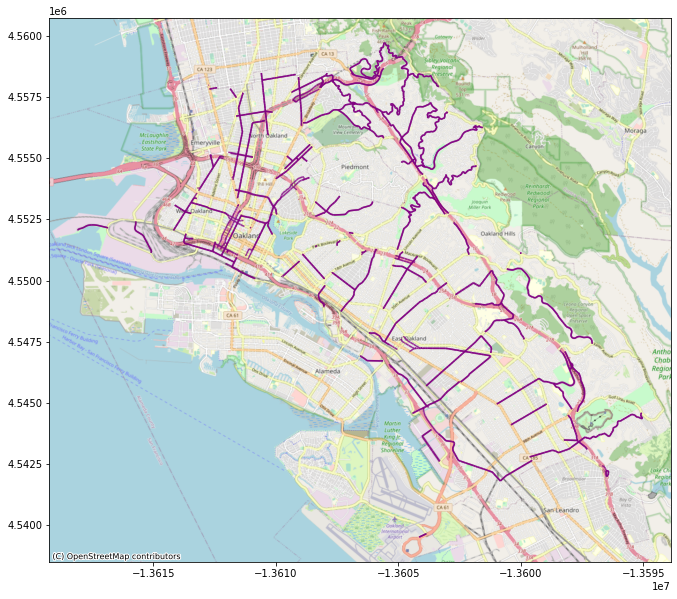

In [42]:
# tertiary road
fig, ax = plt.subplots(figsize=(12, 10))
oakland_tertiary.to_crs(epsg=3857).plot(ax = ax,
                figsize=(12,12),
                markersize=40,
               color="purple",
               edgecolor="white",
               alpha=0.8,
               marker="o"
            );
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

In [43]:
gpd_1_city.crs

<Geographic 2D CRS: +init=epsg:4326 +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [44]:
gpd_1_city_utm = gpd_1_city.to_crs({'init': 'epsg:32610'}).copy()
highway_utm = oakland_highways.to_crs({'init': 'epsg:32610'}).copy()
primary_utm = oakland_primary.to_crs({'init': 'epsg:32610'}).copy()
secondary_utm = oakland_secondary.to_crs({'init': 'epsg:32610'}).copy()
tertiary_utm = oakland_tertiary.to_crs({'init': 'epsg:32610'}).copy()


# UDF
def distance_to_roadway(gps, roadway):
    dists = []
    for i in roadway.geometry:
        dists.append(i.distance(gps))
    return(np.min(dists))

C:\Users\10097\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\10097\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\10097\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mi

In [45]:
tqdm.pandas()
gpd_1_city['closest_highway'] = gpd_1_city_utm['geometry'].progress_apply(distance_to_roadway, roadway = highway_utm)
tqdm.pandas()
gpd_1_city['closest_primary'] = gpd_1_city_utm['geometry'].progress_apply(distance_to_roadway, roadway = primary_utm)
tqdm.pandas()
gpd_1_city['closest_secondary'] = gpd_1_city_utm['geometry'].progress_apply(distance_to_roadway, roadway = secondary_utm)
tqdm.pandas()
gpd_1_city['closest_tertiary'] = gpd_1_city_utm['geometry'].progress_apply(distance_to_roadway, roadway = tertiary_utm)

100%|████████████████████████████████████████████████████████████████████████████| 18219/18219 [08:08<00:00, 37.26it/s]


In [46]:
gpd_1_city.head(2)

index         NO        NO2      PM2p5                     geometry  \
0      0  23.390071  17.539762  17.612700  POINT (-122.32259 37.80678)   
1      1  19.700000  19.956750  15.946719  POINT (-122.32231 37.80615)   

   road_type        zone   pop_den      wind       temp  ...        lat  \
0   tertiary  industrial  8.336845  4.133333  14.950001  ...  37.804456   
1  secondary  industrial  8.336845  4.133333  14.950001  ...  37.804456   

          lon                                       display_name     class  \
0 -122.271356  Oakland, Alameda County, CAL Fire Northern Reg...  boundary   
1 -122.271356  Oakland, Alameda County, CAL Fire Northern Reg...  boundary   

             type importance  closest_highway  closest_primary  \
0  administrative   0.851796      1529.354679      2576.575272   
1  administrative   0.851796      1510.616902      2605.774822   

   closest_secondary closest_tertiary  
0       3.000134e+01         0.003395  
1       5.010205e-08        63.387249  

[2 rows x 27 columns]

In [47]:
nodes['highway'].value_counts()

traffic_signals      778
stop                 356
turning_circle       322
motorway_junction    131
crossing               9
mini_roundabout        4
trailhead              3
Name: highway, dtype: int64

In [48]:
nodes.head(2)

y           x  ref            highway  street_count  \
osmid                                                                   
30362888  37.825844 -122.303049   8A  motorway_junction             3   
30363957  37.825477 -122.307034  NaN                NaN             3   

                             geometry  
osmid                                  
30362888  POINT (-122.30305 37.82584)  
30363957  POINT (-122.30703 37.82548)

In [49]:
nodes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

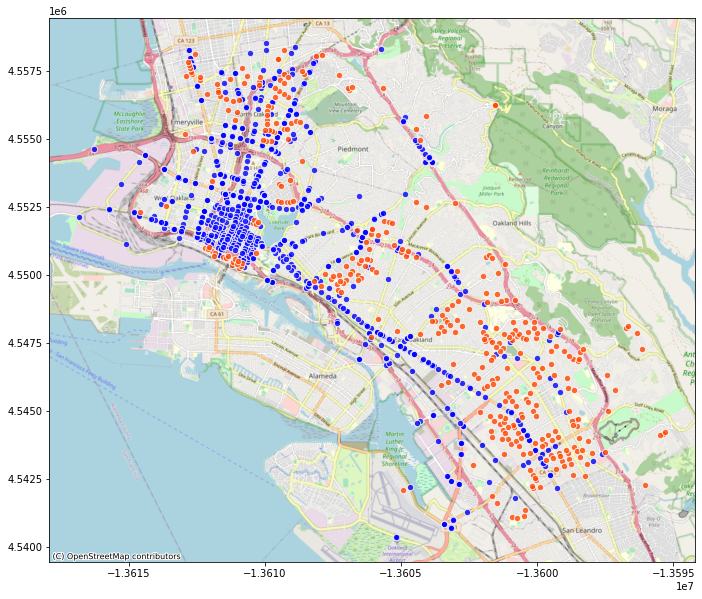

In [50]:
trafic_signals = nodes[nodes['highway'] == 'traffic_signals']
stop_cross = nodes[nodes['highway'] == 'stop']


# traffic signal: blue
# stop sign: red
fig, ax = plt.subplots(figsize=(12, 10))
trafic_signals.to_crs(epsg=3857).plot(ax = ax,
                figsize=(12,12),
                markersize=40,
               color="blue",
               edgecolor="white",
               alpha=0.8,
               marker="o"
            );
stop_cross.to_crs(epsg=3857).plot(ax = ax,
                figsize=(12,12),
                markersize=40,
               color="orangered",
               edgecolor="white",
               alpha=0.8,
               marker="o"
            );
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

In [51]:
traffic_sig_utm = trafic_signals.to_crs({'init': 'epsg:32610'}).copy()
stop_sign_utm = stop_cross.to_crs({'init': 'epsg:32610'}).copy()      

def nearest_intersection(gps, intersections):
    ''' Calculates distance from GPS point to nearest intersection'''
    closest_point = nearest_points(gps, MultiPoint(intersections.values))[1]
    return(gps.distance(closest_point))

C:\Users\10097\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\10097\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [52]:
tqdm.pandas()
gpd_1_city['trafic_signal_dist'] = gpd_1_city_utm['geometry'].progress_apply(nearest_intersection, intersections = traffic_sig_utm['geometry'])
tqdm.pandas()
gpd_1_city['stop_sign_dist'] = gpd_1_city_utm['geometry'].progress_apply(nearest_intersection, intersections = stop_sign_utm['geometry'])

100%|███████████████████████████████████████████████████████████████████████████| 18219/18219 [00:58<00:00, 314.10it/s]


In [53]:
gpd_1_city.head(2)

index         NO        NO2      PM2p5                     geometry  \
0      0  23.390071  17.539762  17.612700  POINT (-122.32259 37.80678)   
1      1  19.700000  19.956750  15.946719  POINT (-122.32231 37.80615)   

   road_type        zone   pop_den      wind       temp  ...  \
0   tertiary  industrial  8.336845  4.133333  14.950001  ...   
1  secondary  industrial  8.336845  4.133333  14.950001  ...   

                                        display_name     class  \
0  Oakland, Alameda County, CAL Fire Northern Reg...  boundary   
1  Oakland, Alameda County, CAL Fire Northern Reg...  boundary   

             type importance  closest_highway closest_primary  \
0  administrative   0.851796      1529.354679     2576.575272   
1  administrative   0.851796      1510.616902     2605.774822   

   closest_secondary  closest_tertiary  trafic_signal_dist stop_sign_dist  
0       3.000134e+01          0.003395           30.001344    1818.142667  
1       5.010205e-08         63.387249           63.387249    1800.106387  

[2 rows x 29 columns]

In [54]:
zone = gpd_1_city['zone']
road_type = gpd_1_city['road_type']

In [55]:
gpd_1_city = pd.get_dummies(gpd_1_city, columns=['road_type'], drop_first=False)      # drop_first=False: do not remove a lable to reduce multicollision 
gpd_1_city = pd.get_dummies(gpd_1_city, columns=['zone'], drop_first=False)

gpd_1_city.head(2)

index         NO        NO2      PM2p5                     geometry  \
0      0  23.390071  17.539762  17.612700  POINT (-122.32259 37.80678)   
1      1  19.700000  19.956750  15.946719  POINT (-122.32231 37.80615)   

    pop_den      wind       temp   Longitude   Latitude  ...  \
0  8.336845  4.133333  14.950001 -122.322594  37.806781  ...   
1  8.336845  4.133333  14.950001 -122.322310  37.806150  ...   

  road_type_primary road_type_residential  road_type_secondary  \
0                 0                     0                    0   
1                 0                     0                    1   

  road_type_tertiary  road_type_unclassified  zone_commercial  \
0                  1                       0                0   
1                  0                       0                0   

   zone_industrial zone_mixed zone_open_space zone_residential  
0                1          0               0                0  
1                1          0               0                0  

[2 rows x 38 columns]

In [56]:
gpd_1_city = pd.concat([gpd_1_city, zone], axis = 1)
gpd_1_city = pd.concat([gpd_1_city, road_type], axis = 1)

gpd_1_city.head(2)

index         NO        NO2      PM2p5                     geometry  \
0      0  23.390071  17.539762  17.612700  POINT (-122.32259 37.80678)   
1      1  19.700000  19.956750  15.946719  POINT (-122.32231 37.80615)   

    pop_den      wind       temp   Longitude   Latitude  ...  \
0  8.336845  4.133333  14.950001 -122.322594  37.806781  ...   
1  8.336845  4.133333  14.950001 -122.322310  37.806150  ...   

  road_type_secondary road_type_tertiary  road_type_unclassified  \
0                   0                  1                       0   
1                   1                  0                       0   

  zone_commercial  zone_industrial  zone_mixed  zone_open_space  \
0               0                1           0                0   
1               0                1           0                0   

  zone_residential        zone  road_type  
0                0  industrial   tertiary  
1                0  industrial  secondary  

[2 rows x 40 columns]

In [57]:
gpd_1_city.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 18219 entries, 0 to 18218
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   index                   18219 non-null  int64   
 1   NO                      18219 non-null  float64 
 2   NO2                     18219 non-null  float64 
 3   PM2p5                   18219 non-null  float64 
 4   geometry                18219 non-null  geometry
 5   pop_den                 18219 non-null  float64 
 6   wind                    18219 non-null  float64 
 7   temp                    18219 non-null  float64 
 8   Longitude               18219 non-null  float64 
 9   Latitude                18219 non-null  float64 
 10  Respiratory_HI          18219 non-null  object  
 11  Pt_CANCR                18219 non-null  object  
 12  place_id                18219 non-null  int64   
 13  osm_type                18219 non-null  object  
 14  osm_id        

In [58]:
gpd_1_city = gpd_1_city.drop(['index', 'Pt_CANCR'], axis=1)

In [59]:
gpd_1_city['Respiratory_HI'] = np.where(gpd_1_city['Respiratory_HI'].str.contains('high'), '3', gpd_1_city['Respiratory_HI'])
gpd_1_city['Respiratory_HI'] = np.where(gpd_1_city['Respiratory_HI'].str.contains('moderate'), '2', gpd_1_city['Respiratory_HI'])
gpd_1_city['Respiratory_HI'] = np.where(gpd_1_city['Respiratory_HI'].str.contains('low'), '1', gpd_1_city['Respiratory_HI'])
gpd_1_city["Respiratory_HI"] = gpd_1_city.Respiratory_HI.astype(float)
gpd_1_city.head(3)

NO        NO2      PM2p5                     geometry   pop_den  \
0  23.390071  17.539762  17.612700  POINT (-122.32259 37.80678)  8.336845   
1  19.700000  19.956750  15.946719  POINT (-122.32231 37.80615)  8.336845   
2  23.611111  23.967768  16.210698  POINT (-122.32230 37.80642)  8.336845   

       wind       temp   Longitude   Latitude  Respiratory_HI  ...  \
0  4.133333  14.950001 -122.322594  37.806781             3.0  ...   
1  4.133333  14.950001 -122.322310  37.806150             3.0  ...   
2  4.133333  14.950001 -122.322301  37.806420             3.0  ...   

   road_type_secondary road_type_tertiary  road_type_unclassified  \
0                    0                  1                       0   
1                    1                  0                       0   
2                    1                  0                       0   

   zone_commercial  zone_industrial zone_mixed zone_open_space  \
0                0                1          0               0   
1                0                1          0               0   
2                0                1          0               0   

  zone_residential        zone  road_type  
0                0  industrial   tertiary  
1                0  industrial  secondary  
2                0  industrial  secondary  

[3 rows x 38 columns]

In [60]:
gpd_1_city.zone.value_counts()

residential    9873
mixed          3485
commercial     3218
industrial     1419
open_space      224
Name: zone, dtype: int64

In [61]:
gpd_1_city.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 18219 entries, 0 to 18218
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   NO                      18219 non-null  float64 
 1   NO2                     18219 non-null  float64 
 2   PM2p5                   18219 non-null  float64 
 3   geometry                18219 non-null  geometry
 4   pop_den                 18219 non-null  float64 
 5   wind                    18219 non-null  float64 
 6   temp                    18219 non-null  float64 
 7   Longitude               18219 non-null  float64 
 8   Latitude                18219 non-null  float64 
 9   Respiratory_HI          18219 non-null  float64 
 10  place_id                18219 non-null  int64   
 11  osm_type                18219 non-null  object  
 12  osm_id                  18219 non-null  int64   
 13  lat                     18219 non-null  float64 
 14  lon           

In [62]:
# numerical features
numerical = ['NO', 'NO2', 'PM2p5', 'pop_den', 'wind', 'temp', 'closest_highway', 'closest_primary', 'closest_secondary', 'closest_tertiary', 
             'trafic_signal_dist', 'stop_sign_dist', 'road_type_motorway', 'road_type_primary', 'road_type_residential', 'road_type_secondary', 'road_type_tertiary', 
             'road_type_unclassified', 'zone_commercial', 'zone_industrial', 'zone_mixed', 'zone_open_space', 'zone_residential', 'Longitude', 'Latitude', 'Respiratory_HI']

# categorical features 
categorical = ['geometry', 'zone', 'road_type']

In [63]:
df_vis = gpd_1_city.copy()

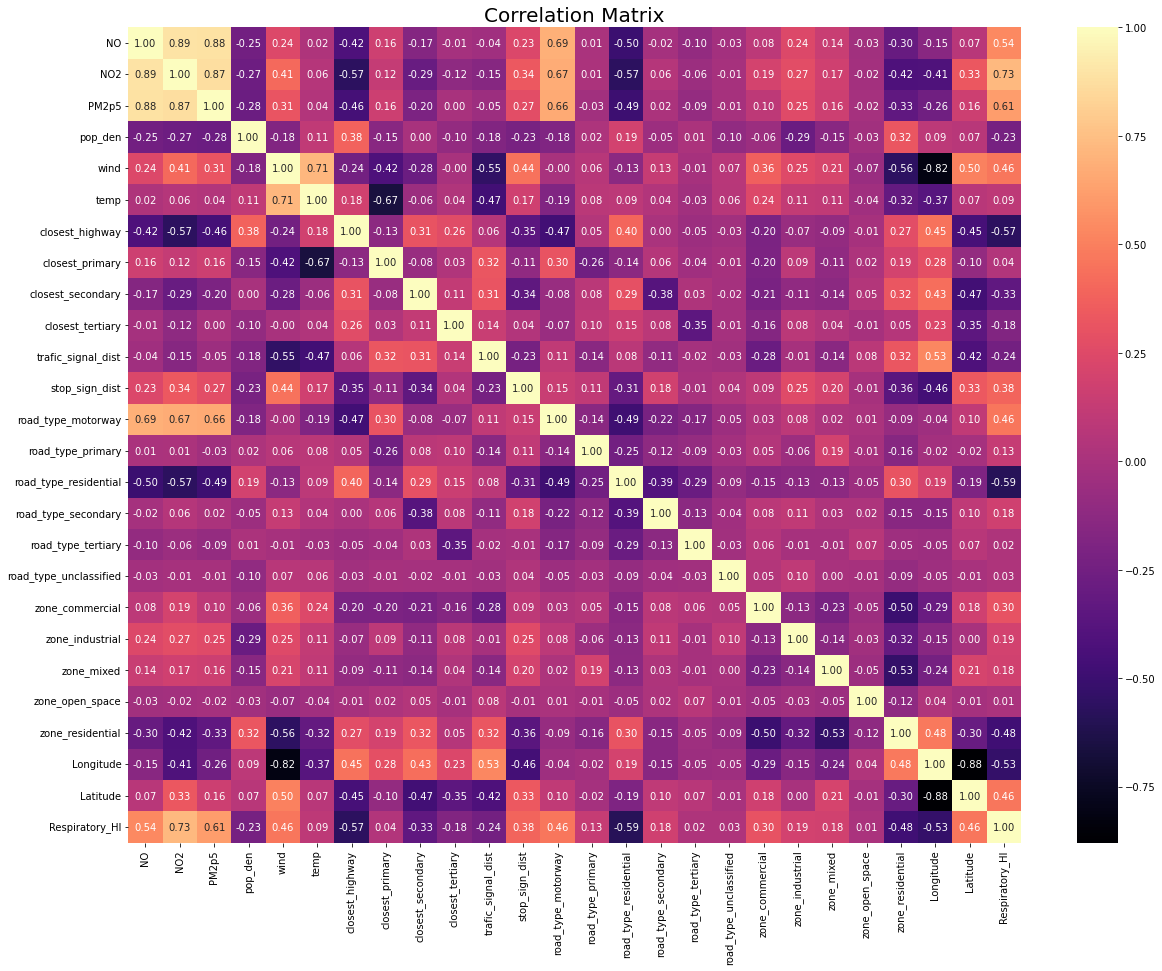

In [64]:
# correlation matrix
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(df_vis[numerical].corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [65]:
Corr = pd.DataFrame(df_vis[numerical].corr()['Respiratory_HI'].sort_values(ascending=False))
Corr = Corr.iloc[1:,:]
Corr.columns=['Target Correlation']
Corr

Target Correlation
NO2                               0.728085
PM2p5                             0.613432
NO                                0.535724
Latitude                          0.462347
road_type_motorway                0.459021
wind                              0.458197
stop_sign_dist                    0.384868
zone_commercial                   0.300468
zone_industrial                   0.192171
zone_mixed                        0.183228
road_type_secondary               0.175915
road_type_primary                 0.129512
temp                              0.094394
closest_primary                   0.040151
road_type_unclassified            0.025218
road_type_tertiary                0.024662
zone_open_space                   0.005270
closest_tertiary                 -0.176559
pop_den                          -0.230723
trafic_signal_dist               -0.240843
closest_secondary                -0.331544
zone_residential                 -0.479148
Longitude                        -0.534273
closest_highway                  -0.566299
road_type_residential            -0.592506

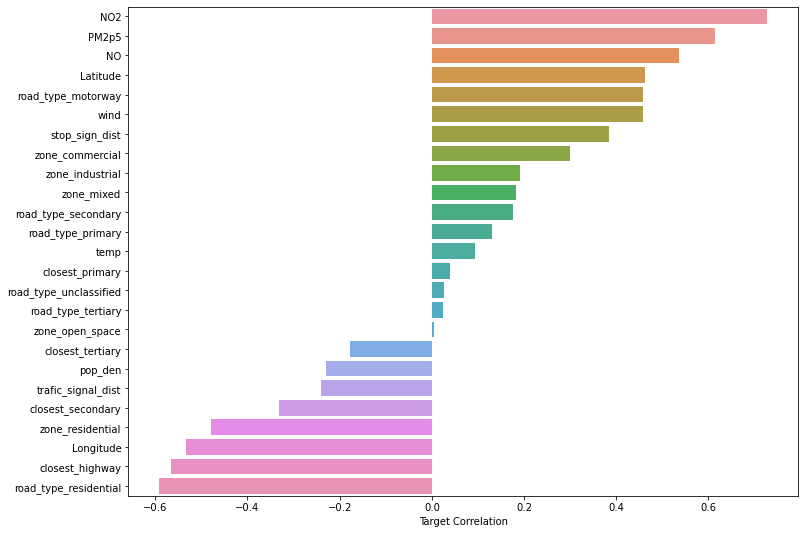

In [66]:
g0 = sns.barplot(x="Target Correlation", y=Corr.index, data=Corr)
g0.figure.set_size_inches(12, 9)

In [67]:
gpd_1_vis = gpd_1_city.copy()

Text(0, 0.5, 'Latitude')

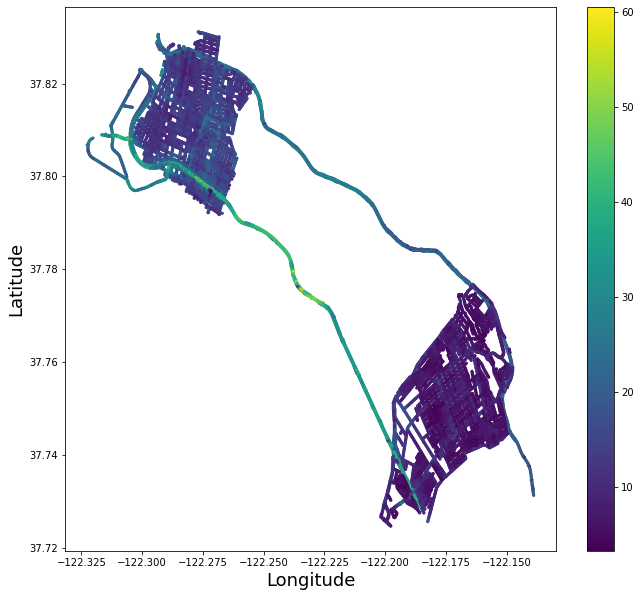

In [68]:
plt.figure(figsize = (11, 10))
plt.scatter(gpd_1_vis.Longitude, gpd_1_vis.Latitude, s=5, c = gpd_1_vis.NO2)
plt.colorbar(); plt.xlabel('Longitude', fontsize=18); plt.ylabel('Latitude', fontsize=18)

Text(0, 0.5, 'Latitude')

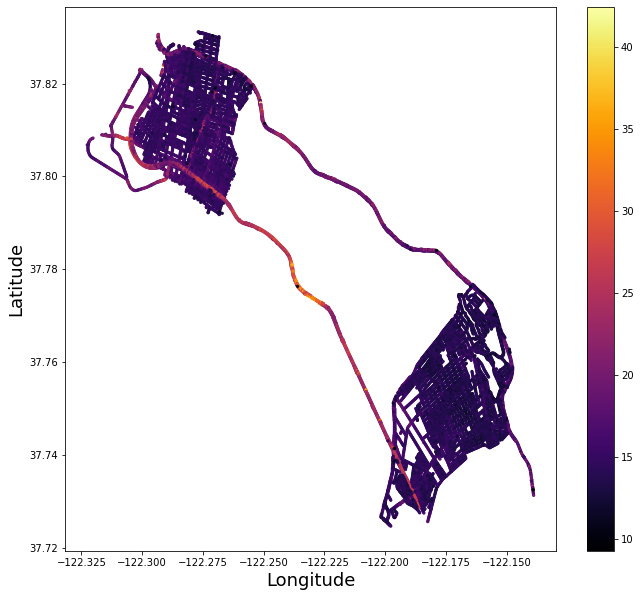

In [69]:
plt.figure(figsize = (11, 10))
plt.scatter(gpd_1_vis.Longitude, gpd_1_vis.Latitude, s=5, c = gpd_1_vis.PM2p5, cmap='inferno')
plt.colorbar(); plt.xlabel('Longitude', fontsize=18); plt.ylabel('Latitude', fontsize=18)

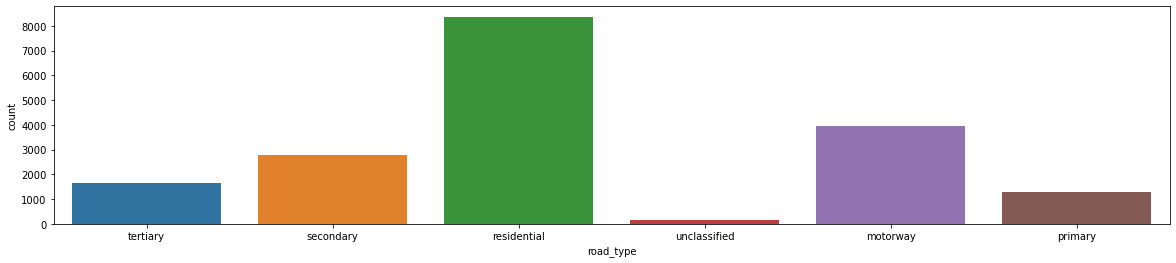

In [70]:
# the sizes of data count 
plt.figure(figsize=(20,4))
sns.countplot(x = 'road_type', data = df_vis);

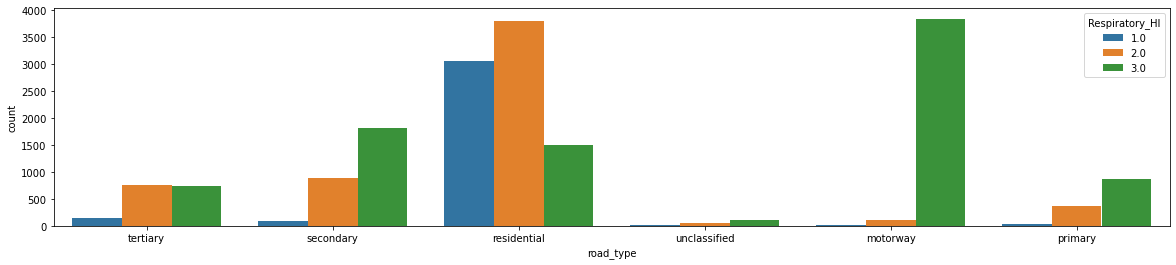

In [71]:
# road type & health
plt.figure(figsize=(20,4))
sns.countplot(x = 'road_type', hue = df_vis['Respiratory_HI'], data = df_vis);

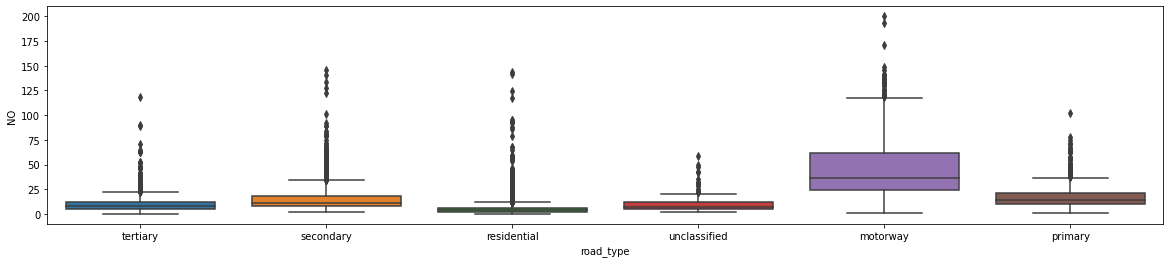

In [72]:
# NO: road type 
plt.figure(figsize=(20,4))
sns.boxplot(x = df_vis['road_type'], y = df_vis['NO']);

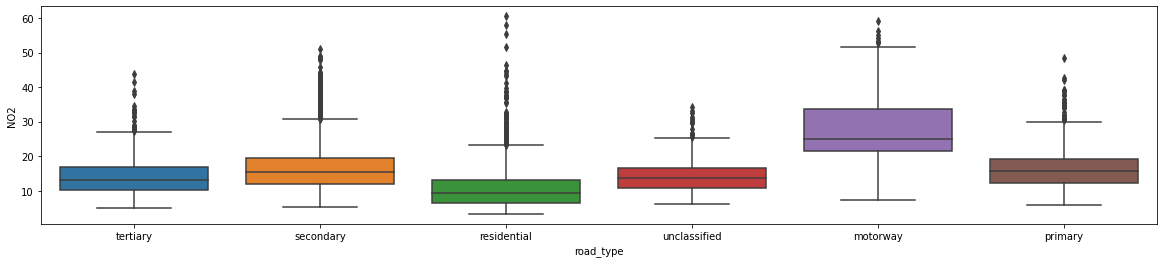

In [73]:
# NO2: road type 
plt.figure(figsize=(20,4))
sns.boxplot(x = df_vis['road_type'], y = df_vis['NO2']);

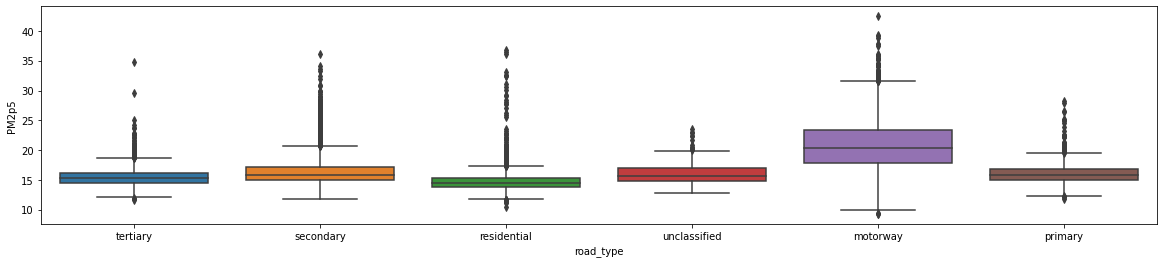

In [74]:
# PM2.5: road type 
plt.figure(figsize=(20,4))
sns.boxplot(x = df_vis['road_type'], y = df_vis['PM2p5']);

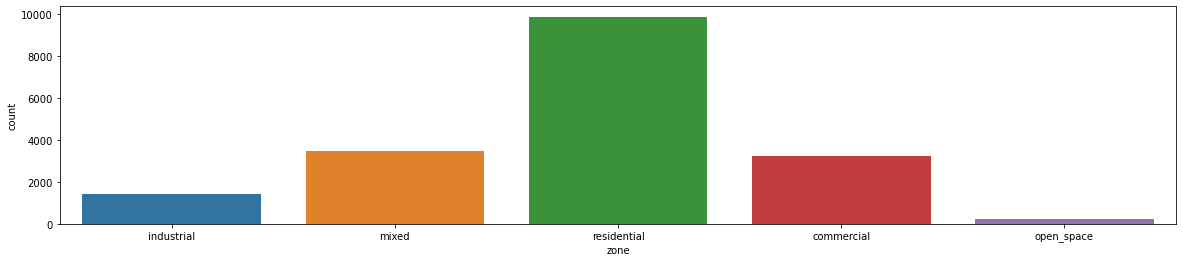

In [75]:
# check the sizes of data count 
plt.figure(figsize=(20,4))
sns.countplot(x = 'zone', data = df_vis);

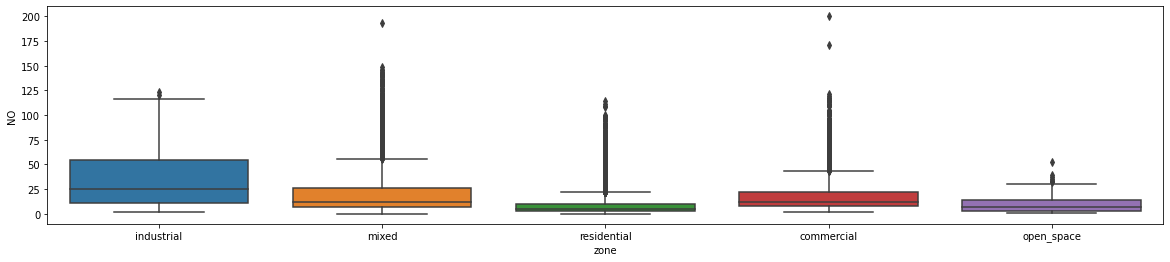

In [76]:
# NO: zone 
plt.figure(figsize=(20,4))
sns.boxplot(x = df_vis['zone'], y = df_vis['NO']);

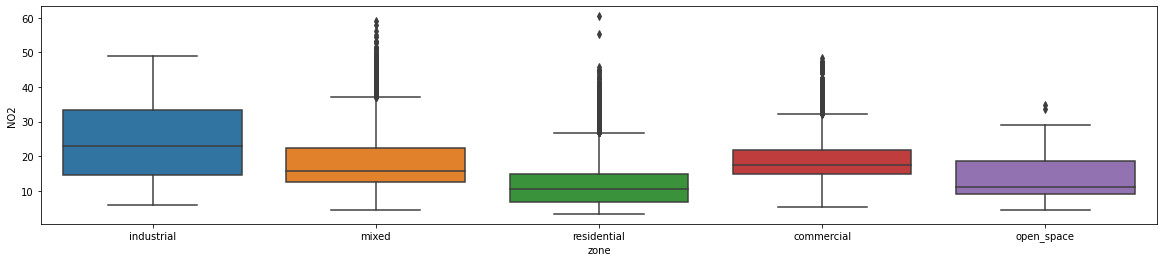

In [77]:
# NO2: zone 
plt.figure(figsize=(20,4))
sns.boxplot(x = df_vis['zone'], y = df_vis['NO2']);

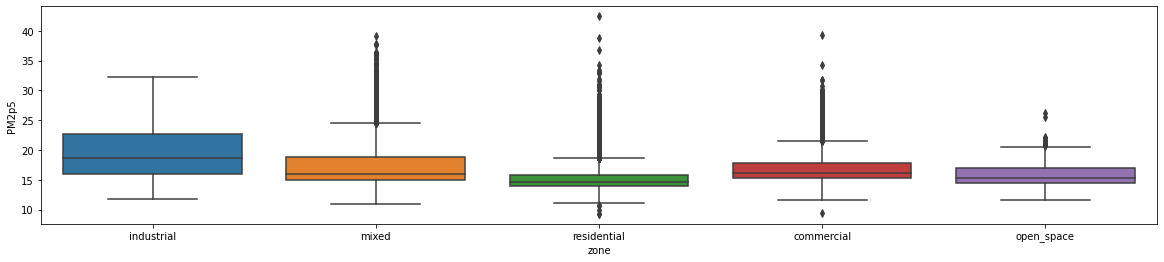

In [78]:
# PM2.5: zone
plt.figure(figsize=(20,4))
sns.boxplot(x = df_vis['zone'], y = df_vis['PM2p5']);

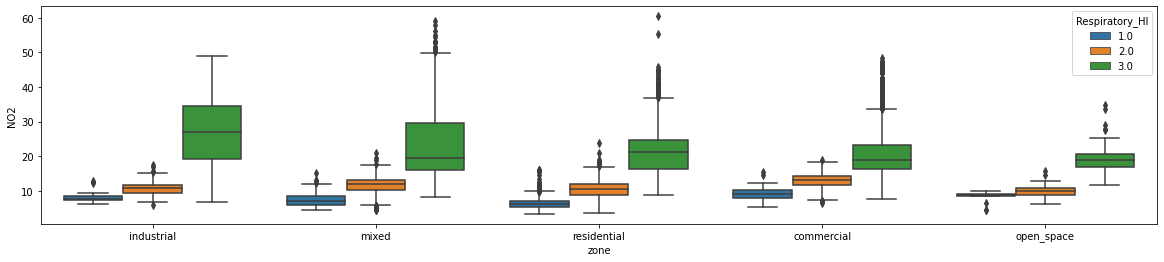

In [79]:
# NO2: zone & health
plt.figure(figsize=(20,4))
sns.boxplot(x = df_vis['zone'], y = df_vis['NO2'], hue = df_vis['Respiratory_HI']);

Text(0, 0.5, 'PM2.5 (ug/m3)')

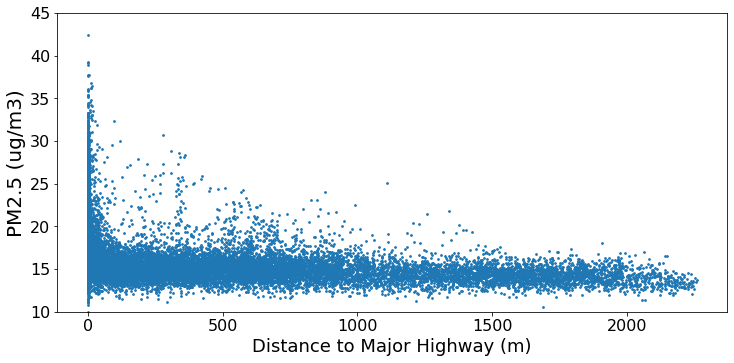

In [80]:
# PM2.5
plt.figure(figsize=(12, 5.5))
plt.scatter(df_vis['closest_highway'], df_vis['PM2p5'], s=3)
plt.ylim(10, 45)
plt.tick_params(labelsize=16)
plt.xlabel('Distance to Major Highway (m)', fontsize=18); plt.ylabel('PM2.5 (ug/m3)', fontsize=20)
# plt.savefig('highway_distance.png', format='png', dpi=300)

In [81]:
df_model = df_vis.copy()

In [82]:
def pred_summary(pred, ytest, limit = 200):
    print('RMSE', np.sqrt(mean_squared_error(ytest, pred)))
    print('R2', r2_score(ytest, pred))


In [83]:
df_model[numerical].columns

Index(['NO', 'NO2', 'PM2p5', 'pop_den', 'wind', 'temp', 'closest_highway',
       'closest_primary', 'closest_secondary', 'closest_tertiary',
       'trafic_signal_dist', 'stop_sign_dist', 'road_type_motorway',
       'road_type_primary', 'road_type_residential', 'road_type_secondary',
       'road_type_tertiary', 'road_type_unclassified', 'zone_commercial',
       'zone_industrial', 'zone_mixed', 'zone_open_space', 'zone_residential',
       'Longitude', 'Latitude', 'Respiratory_HI'],
      dtype='object')

In [84]:
X = df_model[numerical].drop(['Respiratory_HI', 'Longitude','Latitude', 'road_type_unclassified','NO', 'NO2', 'PM2p5'], axis=1)

X.columns

Index(['pop_den', 'wind', 'temp', 'closest_highway', 'closest_primary',
       'closest_secondary', 'closest_tertiary', 'trafic_signal_dist',
       'stop_sign_dist', 'road_type_motorway', 'road_type_primary',
       'road_type_residential', 'road_type_secondary', 'road_type_tertiary',
       'zone_commercial', 'zone_industrial', 'zone_mixed', 'zone_open_space',
       'zone_residential'],
      dtype='object')

In [85]:
# NO
y_NO = df_model['NO']

# NO Split the Data
X_train_NO, X_test_NO, y_train_NO, y_test_NO = model_selection.train_test_split(X, y_NO, test_size=0.25, random_state= 1)
print('training data has ' + str(X_train_NO.shape[0]) + ' observation with ' + str(X_train_NO.shape[1]) + ' features')
print('test data has ' + str(X_test_NO.shape[0]) + ' observation with ' + str(X_test_NO.shape[1]) + ' features')

training data has 13664 observation with 19 features
test data has 4555 observation with 19 features


In [86]:
# NO2
y_NO2 = df_model['NO2']


# NO2 Split the Data
X_train_NO2, X_test_NO2, y_train_NO2, y_test_NO2 = model_selection.train_test_split(X, y_NO2, test_size=0.25, random_state= 1)
print('training data has ' + str(X_train_NO2.shape[0]) + ' observation with ' + str(X_train_NO2.shape[1]) + ' features')
print('test data has ' + str(X_test_NO2.shape[0]) + ' observation with ' + str(X_test_NO2.shape[1]) + ' features')

training data has 13664 observation with 19 features
test data has 4555 observation with 19 features


In [87]:
# PM2.5
y_PM = df_model['PM2p5']


# NO2 Split the Data
X_train_PM, X_test_PM, y_train_PM, y_test_PM = model_selection.train_test_split(X, y_PM, test_size=0.25, random_state= 1)
print('training data has ' + str(X_train_PM.shape[0]) + ' observation with ' + str(X_train_PM.shape[1]) + ' features')
print('test data has ' + str(X_test_PM.shape[0]) + ' observation with ' + str(X_test_PM.shape[1]) + ' features')

training data has 13664 observation with 19 features
test data has 4555 observation with 19 features


In [88]:
# NO

In [89]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_jobs=2)

params = {'max_features': [6, 8, 10],
          'n_estimators': [150, 200]}

forest_grid_no2 = GridSearchCV(forest, params, cv=5, scoring = 'neg_mean_squared_error')
forest_grid_no2.fit(X_train_NO2, y_train_NO2)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=2),
             param_grid={'max_features': [6, 8, 10],
                         'n_estimators': [150, 200]},
             scoring='neg_mean_squared_error')

In [90]:
# best estimator and CV score
print('Best score (RMSE)', np.sqrt(np.abs(forest_grid_no2.best_score_)))
print(forest_grid_no2.best_estimator_)

Best score (RMSE) 2.306444274704909
RandomForestRegressor(max_features=10, n_estimators=200, n_jobs=2)


In [91]:
forest_out_no2 = forest_grid_no2.predict(X_test_NO2)
pred_summary(forest_out_no2, y_test_NO2, limit=50)

RMSE 2.127299966540629
R2 0.944243927728836


<Figure size 648x432 with 0 Axes>

In [92]:
FI_rf = pd.DataFrame(forest_grid_no2.best_estimator_.feature_importances_, index=X_train_NO2.columns, columns=['Feature Importance (RF)'])
FI_rf = FI_rf.sort_values(by='Feature Importance (RF)',ascending=False)
FI_rf

Feature Importance (RF)
closest_highway                       0.330932
road_type_motorway                    0.155561
wind                                  0.134813
temp                                  0.064421
road_type_residential                 0.054401
pop_den                               0.044895
closest_primary                       0.040045
zone_residential                      0.037396
closest_secondary                     0.032760
closest_tertiary                      0.032024
stop_sign_dist                        0.031163
trafic_signal_dist                    0.023712
zone_industrial                       0.005412
zone_commercial                       0.004561
zone_mixed                            0.003862
road_type_secondary                   0.002000
road_type_primary                     0.001153
road_type_tertiary                    0.000813
zone_open_space                       0.000076

In [93]:
gb_forest = GradientBoostingRegressor()

params = {'max_features': [6, 8, 10],
          'learning_rate': [0.05, 0.1, 0.5],
          'n_estimators': [150, 200]}

gb_forest_grid_no2 = GridSearchCV(gb_forest, params, cv=5, scoring = 'neg_mean_squared_error')
gb_forest_grid_no2.fit(X_train_NO2, y_train_NO2)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.05, 0.1, 0.5],
                         'max_features': [6, 8, 10],
                         'n_estimators': [150, 200]},
             scoring='neg_mean_squared_error')

In [94]:
print('Best score (RMSE)', np.sqrt(np.abs(gb_forest_grid_no2.best_score_)))
print(gb_forest_grid_no2.best_estimator_)

Best score (RMSE) 2.9658201550099723
GradientBoostingRegressor(learning_rate=0.5, max_features=8, n_estimators=200)


In [95]:
gb_forest_out_no2 = gb_forest_grid_no2.predict(X_test_NO2)
pred_summary(gb_forest_out_no2, y_test_NO2, limit=50)

RMSE 2.8463504503749575
R2 0.9001814063135127


In [96]:
FI_gb = pd.DataFrame(gb_forest_grid_no2.best_estimator_.feature_importances_, index=X_train_NO2.columns, columns=['Feature Importance (GB)'])
FI_gb = FI_gb.sort_values(by='Feature Importance (GB)',ascending=False)
FI_gb

Feature Importance (GB)
road_type_motorway                    0.364417
wind                                  0.200936
closest_highway                       0.171684
temp                                  0.063065
pop_den                               0.031856
closest_primary                       0.030986
road_type_residential                 0.023975
closest_secondary                     0.022503
stop_sign_dist                        0.021990
closest_tertiary                      0.019179
zone_industrial                       0.016507
trafic_signal_dist                    0.014541
zone_residential                      0.010102
zone_mixed                            0.003130
zone_commercial                       0.002165
road_type_primary                     0.001666
road_type_secondary                   0.000831
zone_open_space                       0.000294
road_type_tertiary                    0.000171

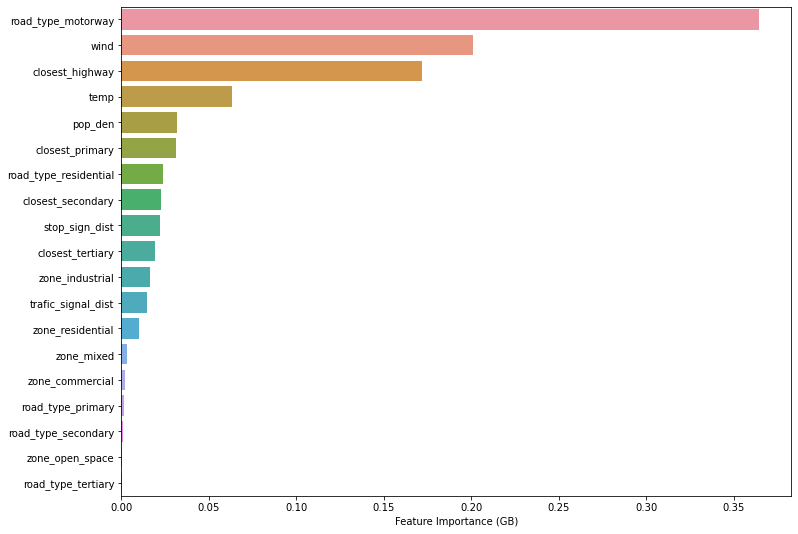

In [97]:
g2 = sns.barplot(x="Feature Importance (GB)", y=FI_gb.index, data=FI_gb)
g2.figure.set_size_inches(12, 9)

In [98]:
grid_search_best_no2 = forest_grid_no2.best_estimator_
print('Parameters currently in use:\n')
pprint(grid_search_best_no2.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 10,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': 2,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [99]:
# Permutation Importance - Random Forest
PI_no2 = permutation_importance(grid_search_best_no2, X_test_NO2, y_test_NO2, n_repeats=5, random_state=1)
# The permutation feature importance is defined to be the decrease in a model score when a single feature value is randomly shuffled. 
# This procedure breaks the relationship between the feature and the target, thus the drop in the model score is indicative of how much the model depends on the feature.


PI_res = pd.DataFrame(data=np.transpose([PI_no2['importances_mean'],PI_no2['importances_std']]), 
             index = X_test_NO2.columns,columns=['PI_mean','PI_std'])
PI_res = PI_res.sort_values(by='PI_mean',ascending=False)
PI_res

PI_mean    PI_std
closest_highway        0.524567  0.008921
wind                   0.277003  0.004717
road_type_motorway     0.105564  0.002644
temp                   0.084381  0.002805
closest_primary        0.056384  0.001392
pop_den                0.046686  0.002214
closest_secondary      0.042573  0.002554
road_type_residential  0.036618  0.000704
stop_sign_dist         0.034044  0.001084
closest_tertiary       0.025256  0.001334
trafic_signal_dist     0.022282  0.001185
zone_residential       0.017783  0.000683
zone_mixed             0.003885  0.000257
zone_industrial        0.003648  0.000361
zone_commercial        0.003276  0.000157
road_type_secondary    0.000612  0.000100
road_type_primary      0.000399  0.000029
road_type_tertiary     0.000211  0.000062
zone_open_space       -0.000020  0.000004

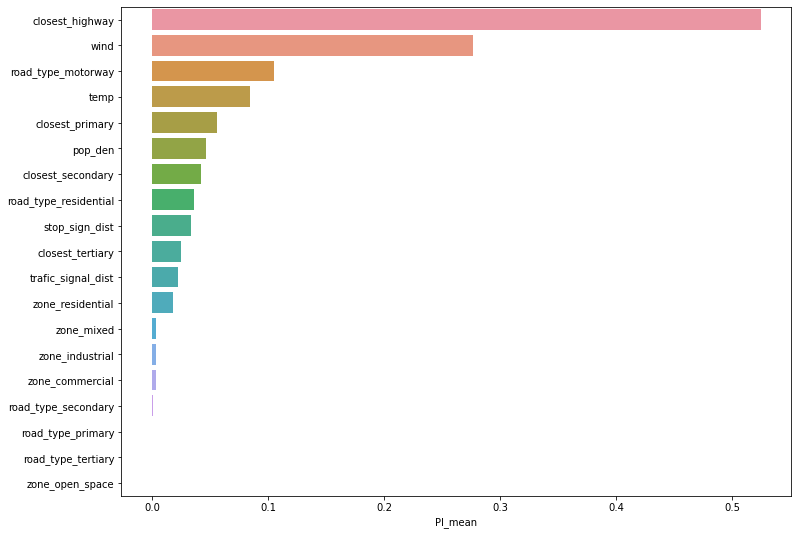

In [100]:
g1 = sns.barplot(x="PI_mean", y=PI_res.index, data=PI_res)
g1.figure.set_size_inches(12, 9)

In [101]:
# summary

summary_0 = pd.DataFrame({'Random Forest':list(FI_rf.index),
              'Gradient Boost':list(FI_gb.index),
               'Permutation Importance':list(PI_res.index)})
summary_0

Random Forest         Gradient Boost Permutation Importance
0         closest_highway     road_type_motorway        closest_highway
1      road_type_motorway                   wind                   wind
2                    wind        closest_highway     road_type_motorway
3                    temp                   temp                   temp
4   road_type_residential                pop_den        closest_primary
5                 pop_den        closest_primary                pop_den
6         closest_primary  road_type_residential      closest_secondary
7        zone_residential      closest_secondary  road_type_residential
8       closest_secondary         stop_sign_dist         stop_sign_dist
9        closest_tertiary       closest_tertiary       closest_tertiary
10         stop_sign_dist        zone_industrial     trafic_signal_dist
11     trafic_signal_dist     trafic_signal_dist       zone_residential
12        zone_industrial       zone_residential             zone_mixed
13        zone_commercial             zone_mixed        zone_industrial
14             zone_mixed        zone_commercial        zone_commercial
15    road_type_secondary      road_type_primary    road_type_secondary
16      road_type_primary    road_type_secondary      road_type_primary
17     road_type_tertiary        zone_open_space     road_type_tertiary
18        zone_open_space     road_type_tertiary        zone_open_space

In [102]:
# NO

In [103]:
forest = RandomForestRegressor(n_jobs=2)

params = {'max_features': [6, 8, 10],
          'n_estimators': [150, 200]}

forest_grid_no = GridSearchCV(forest, params, cv=5, scoring = 'neg_mean_squared_error')
forest_grid_no.fit(X_train_NO, y_train_NO)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=2),
             param_grid={'max_features': [6, 8, 10],
                         'n_estimators': [150, 200]},
             scoring='neg_mean_squared_error')

In [104]:
print('Best score (RMSE)', np.sqrt(np.abs(forest_grid_no.best_score_)))
print(forest_grid_no.best_estimator_)

Best score (RMSE) 6.337364565267561
RandomForestRegressor(max_features=8, n_estimators=200, n_jobs=2)


In [105]:
forest_NO = forest_grid_no.predict(X_test_NO)
pred_summary(forest_NO, y_test_NO, limit=110)

RMSE 5.850251839812369
R2 0.9195443494909272


In [106]:
FI_rf_NO = pd.DataFrame(forest_grid_no.best_estimator_.feature_importances_, index=X_train_NO.columns, columns=['Feature Importance (RF)'])
FI_rf_NO = FI_rf_NO.sort_values(by='Feature Importance (RF)',ascending=False)
FI_rf_NO

Feature Importance (RF)
closest_highway                       0.268348
road_type_motorway                    0.207667
temp                                  0.093275
wind                                  0.067425
pop_den                               0.058758
road_type_residential                 0.057661
closest_primary                       0.052083
closest_secondary                     0.043627
closest_tertiary                      0.041966
stop_sign_dist                        0.038354
trafic_signal_dist                    0.033636
zone_residential                      0.015823
zone_industrial                       0.006942
zone_mixed                            0.005133
zone_commercial                       0.003186
road_type_secondary                   0.002355
road_type_primary                     0.001985
road_type_tertiary                    0.001671
zone_open_space                       0.000105

In [107]:
gb_forest = GradientBoostingRegressor()

params = {'max_features': [6, 8, 10],
          'learning_rate': [0.05, 0.1, 0.5],
          'n_estimators': [150, 200]}

gb_forest_grid_no = GridSearchCV(gb_forest, params, cv=5, scoring = 'neg_mean_squared_error')
gb_forest_grid_no.fit(X_train_NO, y_train_NO)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.05, 0.1, 0.5],
                         'max_features': [6, 8, 10],
                         'n_estimators': [150, 200]},
             scoring='neg_mean_squared_error')

In [108]:
print('Best score (RMSE)', np.sqrt(np.abs(gb_forest_grid_no.best_score_)))
print(gb_forest_grid_no.best_estimator_)

Best score (RMSE) 7.952824651399686
GradientBoostingRegressor(learning_rate=0.5, max_features=10, n_estimators=200)


In [109]:
gb_forest_out_no = gb_forest_grid_no.predict(X_test_NO)
pred_summary(gb_forest_out_no, y_test_NO, limit=50)

RMSE 7.903716936789841
R2 0.8531512740359248


In [110]:
FI_gb_NO = pd.DataFrame(gb_forest_grid_no.best_estimator_.feature_importances_, index=X_train_NO.columns, columns=['Feature Importance (GB)'])
FI_gb_NO = FI_gb_NO.sort_values(by='Feature Importance (GB)',ascending=False)
FI_gb_NO

Feature Importance (GB)
road_type_motorway                    0.402906
closest_highway                       0.146022
wind                                  0.090904
road_type_residential                 0.081431
temp                                  0.075200
pop_den                               0.042961
zone_residential                      0.040217
closest_secondary                     0.026105
closest_tertiary                      0.024450
closest_primary                       0.018873
stop_sign_dist                        0.018707
trafic_signal_dist                    0.015154
zone_mixed                            0.005644
road_type_primary                     0.003410
road_type_secondary                   0.002994
zone_industrial                       0.002320
road_type_tertiary                    0.001678
zone_commercial                       0.000903
zone_open_space                       0.000123

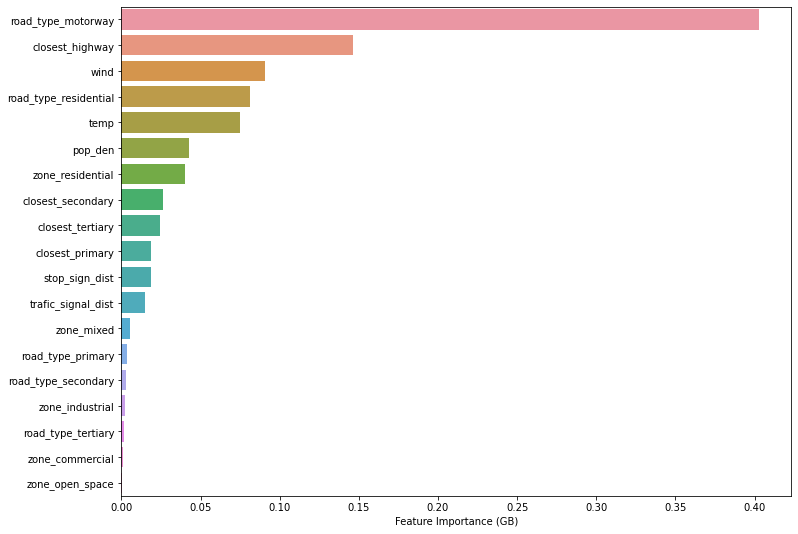

In [111]:
g2_NO = sns.barplot(x="Feature Importance (GB)", y=FI_gb_NO.index, data=FI_gb_NO)
g2_NO.figure.set_size_inches(12, 9)

In [112]:
grid_search_best_no = forest_grid_no.best_estimator_
pprint(grid_search_best_no.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 8,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': 2,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [113]:
PI_no = permutation_importance(grid_search_best_no, X_test_NO, y_test_NO, n_repeats=5, random_state=1)
PI_res_NO = pd.DataFrame(data=np.transpose([PI_no['importances_mean'],PI_no['importances_std']]), 
             index = X_test_NO.columns,columns=['PI_mean','PI_std'])
PI_res_NO = PI_res_NO.sort_values(by='PI_mean',ascending=False)
PI_res_NO

PI_mean    PI_std
closest_highway        0.447496  0.012272
road_type_motorway     0.179692  0.005460
temp                   0.145985  0.001876
wind                   0.095584  0.002920
pop_den                0.059014  0.002327
closest_primary        0.053267  0.003572
closest_secondary      0.047642  0.003127
road_type_residential  0.041342  0.002691
stop_sign_dist         0.035867  0.001596
closest_tertiary       0.033749  0.001653
trafic_signal_dist     0.024260  0.001035
zone_residential       0.015285  0.001876
zone_industrial        0.005890  0.000399
zone_mixed             0.003398  0.000697
zone_commercial        0.001402  0.000377
road_type_primary      0.000793  0.000068
road_type_secondary    0.000776  0.000127
road_type_tertiary     0.000669  0.000181
zone_open_space        0.000009  0.000001

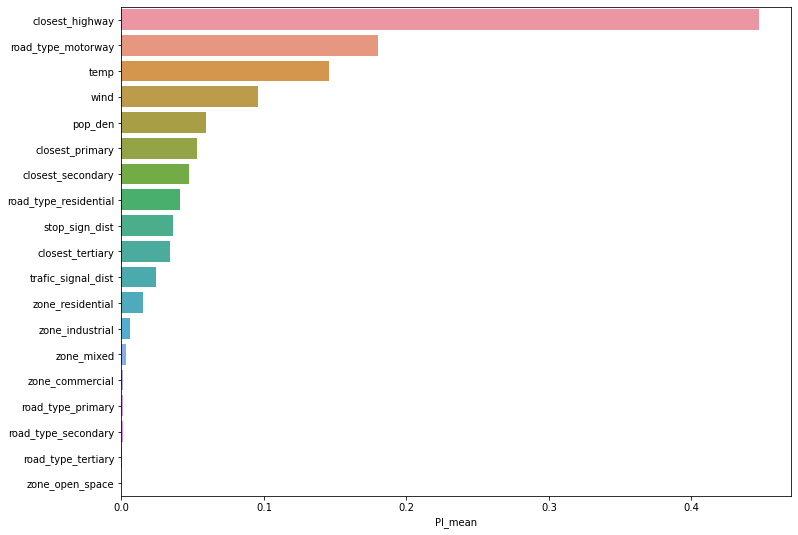

In [114]:
g1_NO = sns.barplot(x="PI_mean", y=PI_res_NO.index, data=PI_res_NO)
g1_NO.figure.set_size_inches(12, 9)

In [115]:
summary_0_NO = pd.DataFrame({'Random Forest':list(FI_rf_NO.index),
              'Gradient Boost':list(FI_gb_NO.index),
               'Permutation Importance':list(PI_res_NO.index)})
summary_0_NO

Random Forest         Gradient Boost Permutation Importance
0         closest_highway     road_type_motorway        closest_highway
1      road_type_motorway        closest_highway     road_type_motorway
2                    temp                   wind                   temp
3                    wind  road_type_residential                   wind
4                 pop_den                   temp                pop_den
5   road_type_residential                pop_den        closest_primary
6         closest_primary       zone_residential      closest_secondary
7       closest_secondary      closest_secondary  road_type_residential
8        closest_tertiary       closest_tertiary         stop_sign_dist
9          stop_sign_dist        closest_primary       closest_tertiary
10     trafic_signal_dist         stop_sign_dist     trafic_signal_dist
11       zone_residential     trafic_signal_dist       zone_residential
12        zone_industrial             zone_mixed        zone_industrial
13             zone_mixed      road_type_primary             zone_mixed
14        zone_commercial    road_type_secondary        zone_commercial
15    road_type_secondary        zone_industrial      road_type_primary
16      road_type_primary     road_type_tertiary    road_type_secondary
17     road_type_tertiary        zone_commercial     road_type_tertiary
18        zone_open_space        zone_open_space        zone_open_space

In [116]:
# PM 2.5

In [117]:
forest = RandomForestRegressor(n_jobs=2)

params = {'max_features': [6, 8, 10],
          'n_estimators': [150, 200, 250]}

forest_grid_pm = GridSearchCV(forest, params, cv=5, scoring = 'neg_mean_squared_error')
forest_grid_pm.fit(X_train_PM, y_train_PM)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=2),
             param_grid={'max_features': [6, 8, 10],
                         'n_estimators': [150, 200, 250]},
             scoring='neg_mean_squared_error')

In [118]:
print('Best score (RMSE)', np.sqrt(np.abs(forest_grid_pm.best_score_)))
print(forest_grid_pm.best_estimator_)

Best score (RMSE) 1.4109582747256046
RandomForestRegressor(max_features=10, n_estimators=150, n_jobs=2)


In [119]:
forest_out_pm = forest_grid_pm.predict(X_test_PM)
pred_summary(forest_out_pm, y_test_PM, limit=50)

RMSE 1.334484752111556
R2 0.8489766653103114


In [120]:
FI_rf_pm = pd.DataFrame(forest_grid_pm.best_estimator_.feature_importances_, index=X_train_PM.columns, columns=['Feature Importance (RF)'])
FI_rf_pm = FI_rf_pm.sort_values(by='Feature Importance (RF)',ascending=False)
FI_rf_pm

Feature Importance (RF)
closest_highway                       0.254681
road_type_motorway                    0.216591
wind                                  0.095764
closest_primary                       0.063067
temp                                  0.057710
pop_den                               0.054979
closest_secondary                     0.050448
closest_tertiary                      0.049966
stop_sign_dist                        0.043162
trafic_signal_dist                    0.037442
road_type_residential                 0.032799
zone_residential                      0.020106
zone_mixed                            0.007554
zone_industrial                       0.006093
zone_commercial                       0.004123
road_type_secondary                   0.003849
road_type_tertiary                    0.000826
road_type_primary                     0.000520
zone_open_space                       0.000322

In [121]:
gb_forest = GradientBoostingRegressor()

params = {'max_features': [6, 8, 10],
          'learning_rate': [0.05, 0.1, 0.5],
          'n_estimators': [150, 200]}

gb_forest_grid_pm = GridSearchCV(gb_forest, params, cv=5, scoring = 'neg_mean_squared_error')
gb_forest_grid_pm.fit(X_train_PM, y_train_PM)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.05, 0.1, 0.5],
                         'max_features': [6, 8, 10],
                         'n_estimators': [150, 200]},
             scoring='neg_mean_squared_error')

In [122]:
print('Best score (RMSE)', np.sqrt(np.abs(gb_forest_grid_pm.best_score_)))
print(gb_forest_grid_pm.best_estimator_)

Best score (RMSE) 1.609642099222706
GradientBoostingRegressor(learning_rate=0.5, max_features=8, n_estimators=200)


In [123]:
gb_forest_out_pm = gb_forest_grid_pm.predict(X_test_PM)
pred_summary(gb_forest_out_pm, y_test_PM, limit=50)

RMSE 1.5205079048239318
R2 0.8039376569589535


In [124]:
FI_gb_pm = pd.DataFrame(gb_forest_grid_pm.best_estimator_.feature_importances_, index=X_train_PM.columns, columns=['Feature Importance (GB)'])
FI_gb_pm = FI_gb_pm.sort_values(by='Feature Importance (GB)',ascending=False)
FI_gb_pm

Feature Importance (GB)
closest_highway                       0.456406
wind                                  0.126658
road_type_motorway                    0.125684
temp                                  0.062028
pop_den                               0.041743
closest_primary                       0.032077
road_type_residential                 0.028571
closest_secondary                     0.026447
stop_sign_dist                        0.023159
closest_tertiary                      0.022136
zone_industrial                       0.016139
trafic_signal_dist                    0.014191
zone_mixed                            0.012550
zone_residential                      0.006989
road_type_secondary                   0.003183
road_type_tertiary                    0.001110
zone_open_space                       0.000332
road_type_primary                     0.000319
zone_commercial                       0.000277

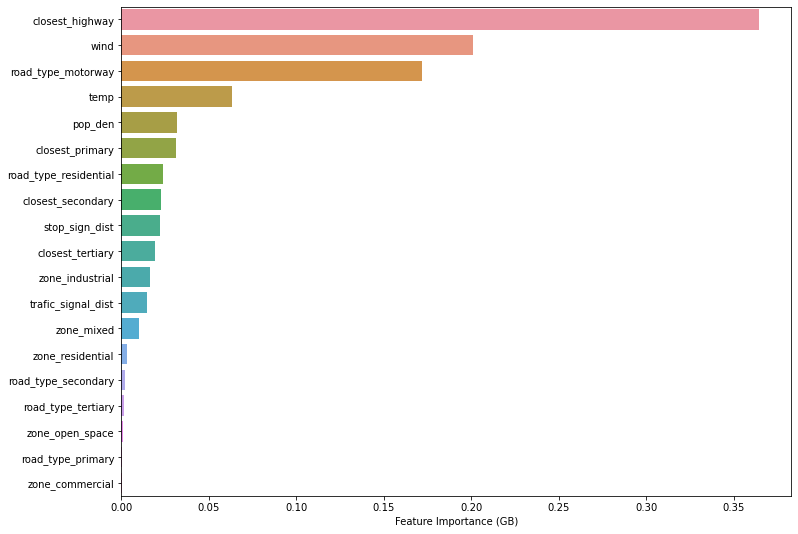

In [125]:
g2_pm = sns.barplot(x="Feature Importance (GB)", y=FI_gb_pm.index, data=FI_gb)
g2_pm.figure.set_size_inches(12, 9)

In [126]:
grid_search_best_pm = forest_grid_pm.best_estimator_
pprint(grid_search_best_pm.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 10,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 150,
 'n_jobs': 2,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [127]:
PI_pm = permutation_importance(grid_search_best_pm, X_test_PM, y_test_PM, n_repeats=5, random_state=1)



PI_res_pm = pd.DataFrame(data=np.transpose([PI_pm['importances_mean'],PI_pm['importances_std']]), 
             index = X_test_PM.columns,columns=['PI_mean','PI_std'])
PI_res_pm = PI_res_pm.sort_values(by='PI_mean',ascending=False)
PI_res_pm

PI_mean    PI_std
closest_highway        0.369251  0.013081
wind                   0.228533  0.005058
road_type_motorway     0.202439  0.007357
closest_primary        0.079658  0.003658
temp                   0.065278  0.002206
pop_den                0.053879  0.002877
closest_secondary      0.036251  0.001885
closest_tertiary       0.034380  0.003982
stop_sign_dist         0.029659  0.001173
trafic_signal_dist     0.021873  0.001914
road_type_residential  0.021861  0.000601
zone_residential       0.011781  0.000909
zone_mixed             0.005819  0.000401
zone_industrial        0.003281  0.000571
zone_commercial        0.001152  0.000262
road_type_secondary    0.000533  0.000197
road_type_primary      0.000109  0.000007
road_type_tertiary     0.000053  0.000033
zone_open_space       -0.000281  0.000010

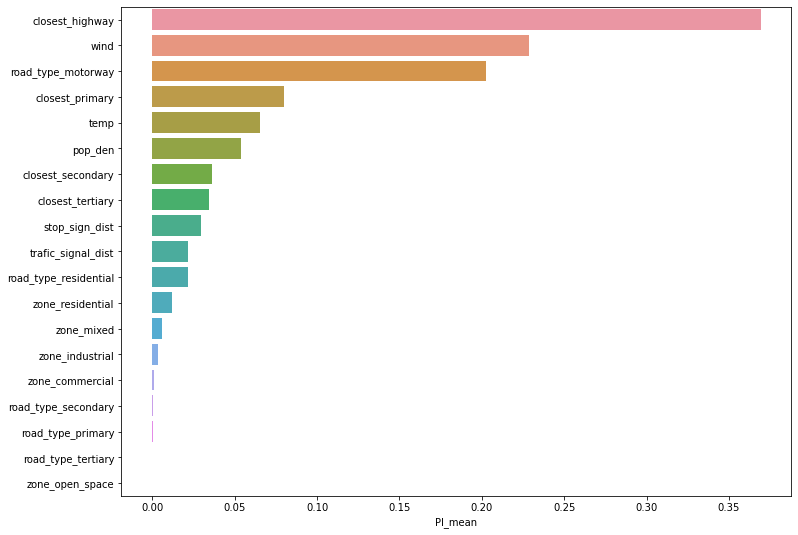

In [128]:
g1_pm = sns.barplot(x="PI_mean", y=PI_res_pm.index, data=PI_res_pm)
g1_pm.figure.set_size_inches(12, 9)

In [129]:
summary_0_pm = pd.DataFrame({'Random Forest':list(FI_rf_pm.index),
              'Gradient Boost':list(FI_gb_pm.index),
               'Permutation Importance':list(PI_res_pm.index)})
summary_0_pm

Random Forest         Gradient Boost Permutation Importance
0         closest_highway        closest_highway        closest_highway
1      road_type_motorway                   wind                   wind
2                    wind     road_type_motorway     road_type_motorway
3         closest_primary                   temp        closest_primary
4                    temp                pop_den                   temp
5                 pop_den        closest_primary                pop_den
6       closest_secondary  road_type_residential      closest_secondary
7        closest_tertiary      closest_secondary       closest_tertiary
8          stop_sign_dist         stop_sign_dist         stop_sign_dist
9      trafic_signal_dist       closest_tertiary     trafic_signal_dist
10  road_type_residential        zone_industrial  road_type_residential
11       zone_residential     trafic_signal_dist       zone_residential
12             zone_mixed             zone_mixed             zone_mixed
13        zone_industrial       zone_residential        zone_industrial
14        zone_commercial    road_type_secondary        zone_commercial
15    road_type_secondary     road_type_tertiary    road_type_secondary
16     road_type_tertiary        zone_open_space      road_type_primary
17      road_type_primary      road_type_primary     road_type_tertiary
18        zone_open_space        zone_commercial        zone_open_space